# Worksheet 07

Name:  JINGYI ZHANG
UID: U26578499

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

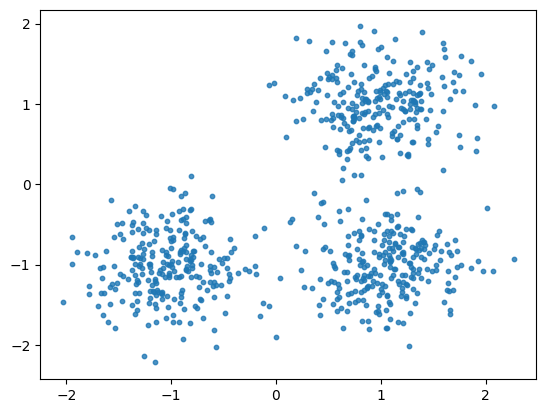

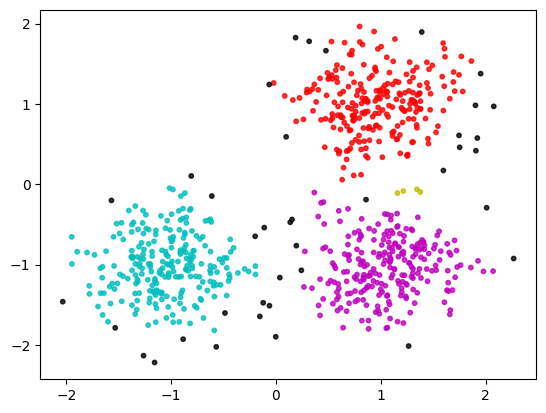

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [-1 for _ in range(len(self.dataset))]## also can try to use 0 instead of -1

    def distance(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])
    
    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if i != j and self.distance(i, j) <= self.epsilon:
                neighborhood.append(j)

        return neighborhood
    
    
    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts
    
    def get_unassigned_neighborhood(self,i):
            neighborhood = self.get_neighborhood(i)
            return [point for point in neighborhood if self.assignments[point] == -1]## also can try to use 0 instead of -1
    
    def is_unassigned(self, i):
        return self.assignments[i]==-1 ## also can try to use 0 instead of -1
    
    
    def assign(self, i, cluster_num):
        self.assignments[i] = cluster_num
        #neighbor_queue = self.get_neighborhood(i)
        neighbor_queue = self.get_unassigned_neighborhood(i)
        while neighbor_queue:
            next_pt = neighbor_queue.pop()

            if self.assignments[next_pt] != -1:## also can try to use 0 instead of -1
                continue

            self.assignments[next_pt] = cluster_num

            if self.is_core(next_pt):
                #next_neighborhood = self.get_neighborhood(next_pt)
                next_neighborhood = self.get_unassigned_neighborhood(next_pt)
                neighbor_queue += [i for i in next_neighborhood if self.assignments[i] == -1] ## also can try to use 0 instead of -1

        return 
    
    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        clusters_num = 2 ## also can try to use other  clusters_num

        for i in range(len(self.dataset)):
            if self.is_core(i) and self.assignments[i] == -1: ## also can try to use 0 instead of -1
                self.assign(i, clusters_num)
                clusters_num += 1
        
        return self.assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 100)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()

## Challenge Problem

Using the code above and the template provided below, create the animation below of the DBScan algorithm.

In [2]:
from IPython.display import Image
#Image(filename="dbscan_2.gif", width=500, height=500)

Hints:

- First animate the dbscan algorithm for the dataset used in class (before trying to create the above dataset)
- Take a snapshot of the assignments when the point gets assigned to a cluster
- Confirm that the snapshot works by saving it to a file
- Don't forget to close the matplotlib plot after saving the figure
- Gather the snapshots in a list of images that you can then save as a gif using the code below
- Use `ax.set_aspect('equal')` so that the circles don't appear to be oval shaped
- To create the above dataset you need two blobs for the eyes. For the mouth you can use the following process to generate (x, y) pairs:
  - Pick an x at random in an interval that makes sense given where the eyes are positioned
  - For that x generate y that is 0.2 * x^2 plus a small amount of randomness
  - `zip` the x's and y's together and append them to the dataset containing the blobs

In [3]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from IPython.display import Image

TEMPFILE = 'temp.png'
colors = np.array([x for x in 'grcbmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 100)

class DBC():
    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts 
        self.epsilon = epsilon
        self.assignments = [-1 for _ in range(len(self.dataset))] ##
        self.snaps = []
        self.colored = []

    def snapshot(self, i):
        fig, ax = plt.subplots()
        self.colored += [(self.dataset[i][0], self.dataset[i][1], colors[self.assignments[i]])]
        ax.scatter(face[:,0], face[:,1], s=10, alpha=0.8)
        xs = [pt[0] for pt in self.colored]
        ys = [pt[1] for pt in self.colored]
        crs = [pt[2] for pt in self.colored]
        ax.scatter(xs, ys, color = crs, s=10, alpha=0.8)
        cir = plt.Circle((self.dataset[i][0], self.dataset[i][1]), 0.2, fill=False, edgecolor='black', alpha=1)
        ax.add_patch(cir)
        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-1, 4)
        ax.set_aspect('equal')
        fig.savefig(TEMPFILE)
        plt.close()
        return im.fromarray(np.asarray(im.open(TEMPFILE)))
    
    def get_snaps(self):
        return self.snaps
    
    def distance(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])
    
    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if i != j and self.distance(i, j) <= self.epsilon:
                neighborhood.append(j)
        return neighborhood
    
    def get_unassigned_neighborhood(self, i):
        neighborhood = self.get_neighborhood(i)
        return [point for point in neighborhood if self.assignments[point] == -1]
    
    def is_assigned(self, i):
        return self.assignments[i] == 1
    
    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts
    
    def make_cluster(self, i, cluster_num):
        self.assignments[i] = cluster_num
        self.snaps += [self.snapshot(i)]
        neighborhood_queue = self.get_unassigned_neighborhood(i)
        while neighborhood_queue:
            next_pt = neighborhood_queue.pop() 
            if self.assignments[next_pt] != -1:
                continue
            self.assignments[next_pt] = cluster_num
            self.snaps += [self.snapshot(next_pt)]
            if self.is_core(next_pt):
                neighborhood_queue += self.get_unassigned_neighborhood(next_pt) 
        return 

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        cluster_num = 0
        for i in range(len(self.dataset)):
            if self.assignments[i] != -1:
                continue
            if self.is_core(i):
                self.make_cluster(i, cluster_num)
                cluster_num += 1
        return self.assignments

centers = [[-1, 2], [1, 2]]
eyes, _ = datasets.make_blobs(n_samples=400, centers=centers, cluster_std=0.4,
                            random_state=0)

mouth_x = np.random.uniform(-2, 2, 350)
mouth_y = [0.2 * (x ** 2) + np.random.uniform(-0.2, 0.2) for x in mouth_x]
mouth = list(zip(mouth_x, mouth_y))
face = np.append(eyes, mouth, axis=0)
DBCprocess = DBC(face, 3, .2)
clustering = DBCprocess.dbscan()
snaps = DBCprocess.snaps
snaps[0].save(
    'dbscanresult.gif',
    optimize=False,
    save_all=True,
    append_images=snaps[1:],
    loop=0,
    duration=25
)
#Image(filename="dbscanresult.gif", width=750, height=750)

